In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Set random seed for reproducibility
np.random.seed(42)

Dataset shape: (442, 10)

First 5 rows:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641



Target variable:


,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0



Feature statistics:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


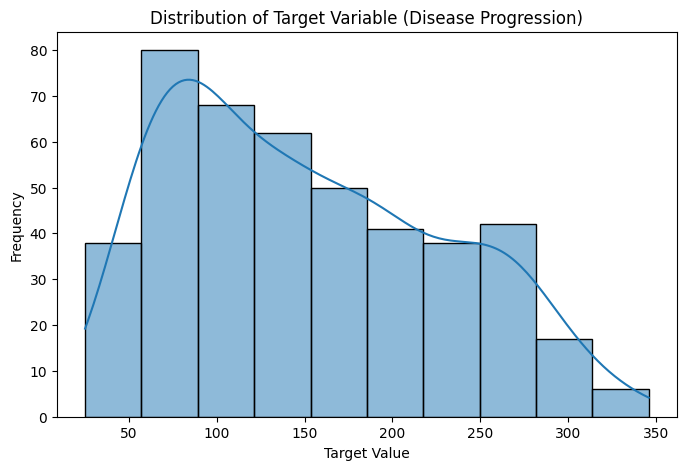

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Display basic information
print("Dataset shape:", X.shape)
print("\nFirst 5 rows:")
display(X.head())

# Display target variable
print("\nTarget variable:")
display(y.head())

# Basic statistics
print("\nFeature statistics:")
display(X.describe())

# Target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable (Disease Progression)')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

In [3]:
# Check for missing values
print("Missing values in features:")
print(X.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Missing values in features:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Training set size: (353, 10)
Test set size: (89, 10)


Feature importance scores:


,Feature,Score,P-value
2,bmi,202.386965,1.396737e-36
8,s5,153.967806,1.454635e-29
3,bp,86.558038,1.498396e-18
7,s4,77.417118,6.365823e-17
9,s6,63.102304,2.691046e-14
6,s3,60.708775,7.561955e-14
4,s1,14.556110,1.607302e-04
0,age,14.098670,2.029829e-04
5,s2,8.631430,3.522507e-03
1,sex,0.017776,8.940129e-01


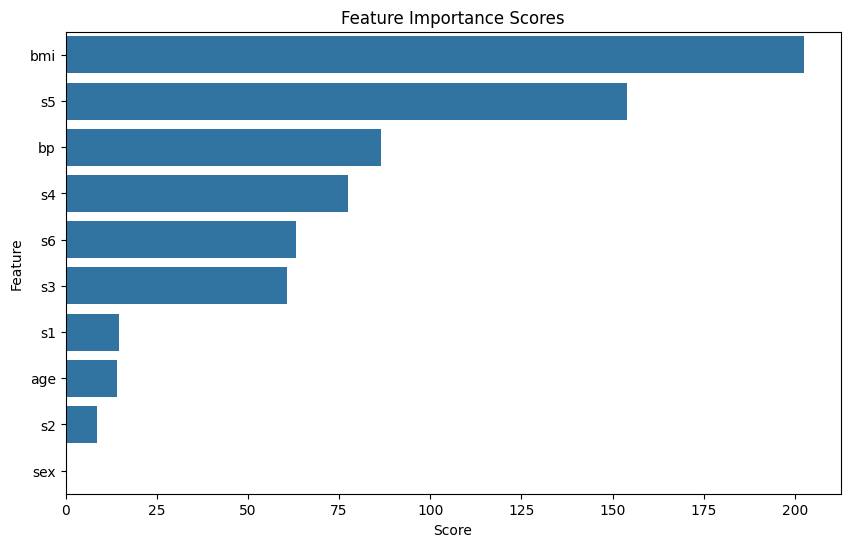


Selected top 5 features: ['bmi' 's5' 'bp' 's4' 's6']


In [4]:
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train, y_train)

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
}).sort_values('Score', ascending=False)

print("Feature importance scores:")
display(feature_scores)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance Scores')
plt.show()

# Select top 5 features
top_features = feature_scores['Feature'].head(5).values
print("\nSelected top 5 features:", top_features)

# Reduce datasets to selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [5]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = model.predict(X_test_selected)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'Model': model,
        'MSE': mse,
        'R2': r2
    }

    # Print results
    print(f"\n{name} Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
results_df = results_df[['MSE', 'R2']].sort_values('R2', ascending=False)
print("\nModel Comparison:")
display(results_df)


Linear Regression Performance:
MSE: 2899.74
R2 Score: 0.45

Ridge Regression Performance:
MSE: 2899.16
R2 Score: 0.45

Random Forest Performance:
MSE: 3086.42
R2 Score: 0.42

Model Comparison:


,MSE,R2
Ridge Regression,2899.164457,0.452797
Linear Regression,2899.742682,0.452688
Random Forest,3086.415945,0.417454


In [6]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                          cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_selected, y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_rf.predict(X_test_selected)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nBest Random Forest Parameters:", grid_search.best_params_)
print(f"Best MSE: {mse_best:.2f}")
print(f"Best R2 Score: {r2_best:.2f}")

# Compare with baseline
baseline_r2 = results['Random Forest']['R2']
improvement = (r2_best - baseline_r2) / baseline_r2 * 100
print(f"\nImprovement over baseline: {improvement:.1f}%")


Best Random Forest Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best MSE: 2859.34
Best R2 Score: 0.46

Improvement over baseline: 10.3%


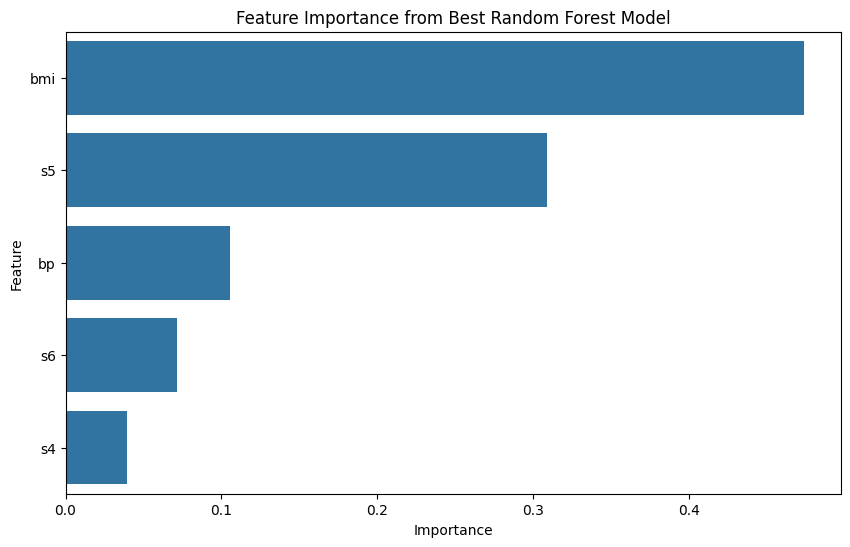

In [7]:
# Get feature importance from best model
feature_importance = pd.DataFrame({
    'Feature': top_features,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Best Random Forest Model')
plt.show()

Cross-validation R2 scores: [0.40098446 0.48919542 0.45870356 0.37526934 0.44783239]
Mean CV R2 score: 0.43 (±0.04)


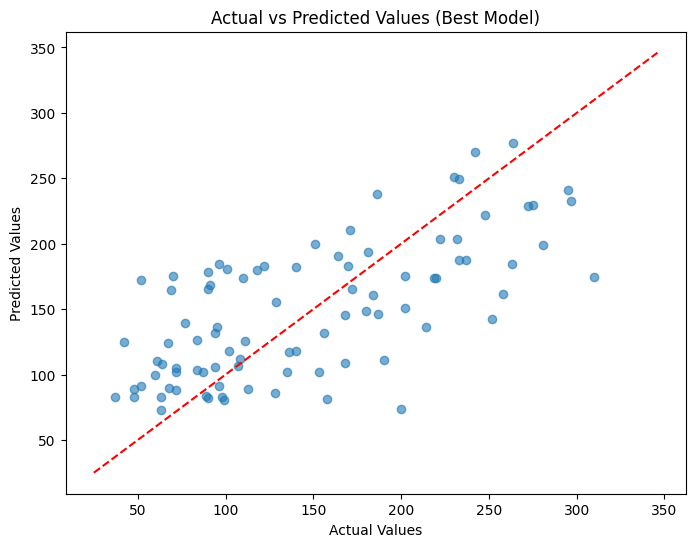

In [8]:
# Cross-validation on the entire dataset (selected features)
X_selected = X_scaled[top_features]
cv_scores = cross_val_score(best_rf, X_selected, y, cv=5, scoring='r2')

print("Cross-validation R2 scores:", cv_scores)
print(f"Mean CV R2 score: {np.mean(cv_scores):.2f} (±{np.std(cv_scores):.2f})")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Best Model)')
plt.show()

In [9]:
# Summary of results
print("Final Model Summary:")
print(f"Algorithm: Random Forest Regressor")
print(f"Selected Features: {list(top_features)}")
print(f"Test MSE: {mse_best:.2f}")
print(f"Test R2: {r2_best:.2f}")
print(f"Mean CV R2: {np.mean(cv_scores):.2f}")

# Save the best model
import joblib
joblib.dump(best_rf, 'best_diabetes_model.pkl')
print("\nBest model saved as 'best_diabetes_model.pkl'")

Final Model Summary:
Algorithm: Random Forest Regressor
Selected Features: ['bmi', 's5', 'bp', 's4', 's6']
Test MSE: 2859.34
Test R2: 0.46
Mean CV R2: 0.43

Best model saved as 'best_diabetes_model.pkl'
